In [1]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
#import thinkplot
#import thinkstats2 #commented out, not installed/used
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

##Seaborn for fancy plots.
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

# Assignment - Basic Predictions and Regression

## Regression Modelling

<ul>
<li><b>Use the data provided to try to predict the wage_eur target varaible. </b>
</ul>

The data is from FIFA rankings for players. You don't need to know anything about soccer or video games for this, so if these values are meaningless to you, just treat them as numbers and you'll be fine. All of the features are rankings are evaluations of how good different soccar players are at different skills.

The goal here is to use the other data to predict the wage column. This is a regression problem, so you'll need to use a regression model. You can use any of the models you're comfortable with. As well, we want to be able to predict as accurately as possible, so you'll need to use some sort of metric to evaluate your model and (probably) make some changes to improve it. These changes can include things like changing the model, changing the features changing the hyperparameters, or considering factors such as target distribution or collinearity.

## Grading

The grades for this assignment will come from three main sources:

<ul>
<li> <b>15%</b> Code Quality - is your code well structured, well commented, and easy to follow? Is it clear what you're doing and why? Is it easy to run? Is it easy to understand the results?
<li> <b>35%</b> Results - how well does your model perform? How well does it predict the wage column? This will be judged in context of the other models.
<li> <b>50%</b> Process - how well do you explain what you did? How well do you explain why you did it in response to the prompts below?
</ul>

## Explainations of Process

Please fill in (and extend if required) the list here to explain what you did. There are multiple reasonable things you could do to approach this, so please note what you did here. For most people I assume this will be about 3-5 statements - you don't need to explain the internals of things we covered (e.g. if there's a hypothesis test, you don't need to explain how that works), just how you structured your approach to the problem.

<ul>
<li>
<li>
<li>
</ul>

As well, please answer the following specific questions, based on what you did (~2-3 sentences each):

<ul>
<li> What metric/value/quality did you use to evaluate your model? Why did you choose this?
<li> What did you do to improve your model? Why did you choose this? Was there a notable improvement?
<li> What did you do to prepare the data prior to modelling? Why?
</ul>


# Assignment Start:
All content above this box was provided as part of the assignment. My work follows:

In [2]:
#additional imports: 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [3]:
# Load file and read csv into pandas dataframe
#!workstation:
filepath = "S:/83NCO_Code/personal_repo/Python/DATA_3320_pred_analytics/ML assignment/Players 20 2.csv"
#!laptop:
#filepath = "D:/83NCO_Code/personal_repo/Python/DATA_3320_pred_analytics/ML assignment/Players 20 2.csv"
# be sure to replace filepath with wherever the data is stored. 

df = pd.read_csv(filepath)
df.shape #confirm Df creation and get an idea of shape. 

(18278, 30)

First things first I want an idea of what this data looks like. Lets run some exploratory commands. 

In [4]:
df.head()

,wage_eur,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
0,565000,88,95,70,92,88,97,93,94,92,...,94,48,40,94,94,75,96,33,37,26
1,405000,84,94,89,83,87,89,81,76,77,...,93,63,29,95,82,85,95,28,32,24
2,290000,87,87,62,87,87,96,88,87,81,...,84,51,36,87,90,90,94,27,26,29
3,125000,13,11,15,43,13,12,13,14,40,...,12,34,19,11,65,11,68,27,12,18
4,470000,81,84,61,89,83,95,83,79,83,...,80,54,41,87,89,88,91,34,27,22


In [5]:
df.isna().value_counts() 

wage_eur  attacking_crossing  attacking_finishing  attacking_heading_accuracy  attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  skill_ball_control  movement_acceleration  movement_sprint_speed  movement_agility  movement_reactions  movement_balance  power_shot_power  power_jumping  power_stamina  power_strength  power_long_shots  mentality_aggression  mentality_interceptions  mentality_positioning  mentality_vision  mentality_penalties  mentality_composure  defending_marking  defending_standing_tackle  defending_sliding_tackle
False     False               False                False                       False                    False              False            False        False              False               False               False                  False                  False             False               False             False             False          False          False           False             False  

In [6]:
df.isnull().value_counts()

wage_eur  attacking_crossing  attacking_finishing  attacking_heading_accuracy  attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  skill_ball_control  movement_acceleration  movement_sprint_speed  movement_agility  movement_reactions  movement_balance  power_shot_power  power_jumping  power_stamina  power_strength  power_long_shots  mentality_aggression  mentality_interceptions  mentality_positioning  mentality_vision  mentality_penalties  mentality_composure  defending_marking  defending_standing_tackle  defending_sliding_tackle
False     False               False                False                       False                    False              False            False        False              False               False               False                  False                  False             False               False             False             False          False          False           False             False  

In [7]:
df.describe()

,wage_eur,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,9456.942773,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,...,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631
std,21351.714095,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,...,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734
min,0.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,...,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000
25%,1000.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,...,32.000000,44.000000,25.000000,39.000000,44.000000,39.000000,51.000000,29.000000,27.000000,24.000000
50%,3000.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,49.000000,41.000000,56.000000,...,51.000000,58.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.000000,55.000000,52.000000
75%,8000.000000,64.000000,62.000000,64.000000,68.000000,56.000000,68.000000,62.000000,56.000000,64.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,565000.000000,93.000000,95.000000,93.000000,92.000000,90.000000,97.000000,94.000000,94.000000,92.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,92.000000,90.000000


In [8]:
df.corr()

,wage_eur,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
wage_eur,1.000000,0.236022,0.221029,0.191575,0.302734,0.260308,0.237614,0.263147,0.235657,0.288948,...,0.251014,0.204150,0.163973,0.230914,0.327220,0.222270,0.420750,0.155790,0.133316,0.114830
attacking_crossing,0.236022,1.000000,0.669081,0.476990,0.810796,0.695453,0.864329,0.837687,0.763377,0.752596,...,0.747034,0.475252,0.427447,0.792841,0.682691,0.654811,0.598011,0.451027,0.431927,0.412995
attacking_finishing,0.221029,0.669081,1.000000,0.487541,0.673158,0.891961,0.829514,0.771683,0.707490,0.525896,...,0.884368,0.266914,-0.008241,0.895442,0.700516,0.847101,0.568326,0.038772,-0.014762,-0.053809
attacking_heading_accuracy,0.191575,0.476990,0.487541,1.000000,0.658721,0.519260,0.566755,0.452491,0.414251,0.524501,...,0.516383,0.709040,0.552948,0.545076,0.272964,0.567860,0.540732,0.589378,0.564669,0.537327
attacking_short_passing,0.302734,0.810796,0.673158,0.658721,1.000000,0.704835,0.851166,0.778343,0.737650,0.896180,...,0.766848,0.629175,0.552770,0.767433,0.705144,0.687828,0.717620,0.580156,0.555009,0.522307
attacking_volleys,0.260308,0.695453,0.891961,0.519260,0.704835,1.000000,0.814068,0.811759,0.753569,0.576242,...,0.873729,0.344272,0.091834,0.856960,0.698090,0.839344,0.620341,0.129128,0.082132,0.043186
skill_dribbling,0.237614,0.864329,0.829514,0.566755,0.851166,0.814068,1.000000,0.848457,0.758723,0.727149,...,0.846430,0.461904,0.307204,0.904501,0.725704,0.776941,0.631681,0.351134,0.318368,0.290333
skill_curve,0.263147,0.837687,0.771683,0.452491,0.778343,0.811759,0.848457,1.000000,0.861202,0.712008,...,0.840344,0.407359,0.275809,0.821899,0.746594,0.758939,0.640294,0.301764,0.268886,0.239226
skill_fk_accuracy,0.235657,0.763377,0.707490,0.414251,0.737650,0.753569,0.758723,0.861202,1.000000,0.705434,...,0.807379,0.398740,0.293318,0.739536,0.715011,0.739872,0.603169,0.307811,0.283099,0.251654
skill_long_passing,0.288948,0.752596,0.525896,0.524501,0.896180,0.576242,0.727149,0.712008,0.705434,1.000000,...,0.675564,0.598114,0.600428,0.624053,0.694247,0.554974,0.672855,0.605548,0.593901,0.570304


It looks like this dataset is all numeric values, which is nice because it allows us to run the correlation matrix without needing to drop or convert categorical values first.

I noticed that the defensive values all have a very high correlation with eachother.

Lets start prepping this set for modeling.

In [9]:
#creating two new dataframes, x and y. Dropping the variable of interest from x, and everything but from y. 
x = df.drop(['wage_eur'], axis=1)
y = df['wage_eur']
# using the above as inputs, create test/train variables of subsets of the data using the traintestsplit function.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.42, random_state=69)


In [10]:
y_train.head()

8639      1000
15335     4000
11354     1000
10981     8000
315      20000
Name: wage_eur, dtype: int64

In [11]:
x_train.head()

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
8639,70,58,41,71,57,67,67,68,67,67,...,64,49,35,62,69,57,70,38,32,34
15335,48,49,34,69,42,61,41,46,61,63,...,40,42,24,47,51,49,54,39,41,39
11354,43,65,55,52,59,63,49,44,35,64,...,58,42,16,61,50,57,48,14,18,15
10981,43,58,58,63,55,66,49,45,57,62,...,63,55,37,63,65,62,60,24,32,43
315,17,42,80,70,39,64,39,19,74,62,...,30,83,80,49,64,72,74,84,85,85


In [12]:
x_test.head()

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
13583,33,67,64,55,53,57,33,32,26,55,...,53,27,15,63,49,56,49,36,17,10
15709,51,57,46,60,46,63,47,35,42,60,...,48,38,20,55,59,54,58,23,26,24
3836,72,65,57,75,70,71,70,66,74,75,...,67,66,64,66,75,61,74,67,65,65
11605,49,55,65,68,49,62,41,40,65,66,...,50,70,63,56,58,42,62,66,65,63
10207,26,24,64,50,33,41,32,33,39,49,...,27,74,66,28,34,54,45,59,64,68


In [13]:
y_test.head()

13583     5000
15709     1000
3836     27000
11605     3000
10207     2000
Name: wage_eur, dtype: int64

The above head commands show that the data has been split up successfully. 

In [14]:
#create a Logistic Regression model using one versus rest and the liblinear library.
lr = LogisticRegression(multi_class='ovr', solver='liblinear')

In [15]:
model = lr.fit(x_train, y_train)
# pretty crazy how this takes about 1.5 mins on my laptop, and only ~30 seconds on my workstation

C:\Users\Meta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [16]:
#assign the models predictions of the y variable from test set data to wage_pred
wage_pred = model.predict(x_test)

In [17]:
#compare actual y_test values to wage_pred for accuracy, zero_division set to 0 to supress error messages 
# print('Classification Report:\n', classification_report(y_test,wage_pred,zero_division=0)) #commented out to reduce render times.

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       104
        1000       0.38      0.89      0.54      2097
        2000       0.08      0.12      0.10      1231
        3000       0.03      0.01      0.01       791
        4000       0.02      0.01      0.01       572
        5000       0.01      0.01      0.01       359
        6000       0.13      0.01      0.01       299
        7000       0.00      0.00      0.00       221
        8000       0.00      0.00      0.00       192
        9000       0.09      0.01      0.01       143
       10000       0.00      0.00      0.00       104
       11000       0.08      0.01      0.02        88
       12000       0.00      0.00      0.00        93
       13000       0.00      0.00      0.00        64
       14000       0.00      0.00      0.00        72
       15000       0.00      0.00      0.00        64
       16000       0.00      0.00      0.00        47
   

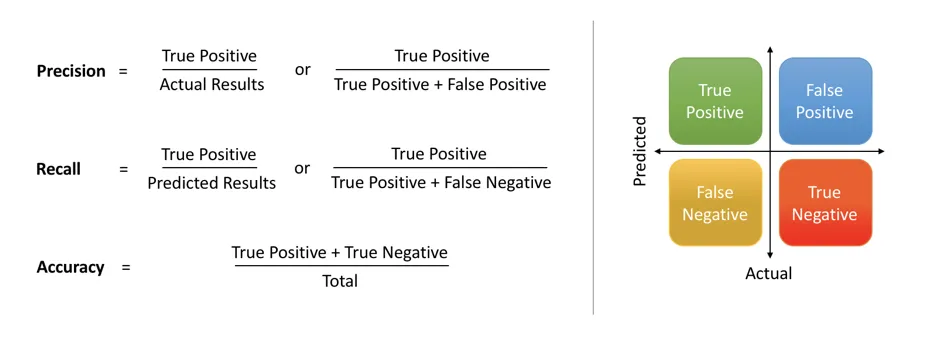

This first attempt has not been very successful. The vast majority of the results have precision and recall values lower than .01. and an overall accuracy of .26 implying that only about 1 in 4 predictions are correct. Before i dive into any reductive applications to see if we can get a better fit, im going to play with the model design paramaters. 

In [18]:
# Resetting the test and train values with different arguments for the function: changing test size and random state.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [19]:
# retraining the model on the new data subsets. 
model = lr.fit(x_train, y_train)

C:\Users\Meta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [20]:
#assign the models predictions of the y variable from test set data to wage_pred
wage_pred = model.predict(x_test)
#compare actual y_test values to wage_pred for accuracy, zero_division set to 0 to supress error messages 
# print('Classification Report:\n', classification_report(y_test,wage_pred,zero_division=0)) #commented out to reduce render times.

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.02      0.04        52
        1000       0.38      0.92      0.54       997
        2000       0.06      0.09      0.07       601
        3000       0.04      0.02      0.02       364
        4000       0.00      0.00      0.00       277
        5000       0.00      0.00      0.00       153
        6000       0.00      0.00      0.00       135
        7000       0.00      0.00      0.00       112
        8000       0.00      0.00      0.00        90
        9000       0.14      0.02      0.03        57
       10000       0.00      0.00      0.00        55
       11000       0.00      0.00      0.00        61
       12000       0.00      0.00      0.00        52
       13000       0.00      0.00      0.00        38
       14000       0.00      0.00      0.00        42
       15000       0.00      0.00      0.00        36
       16000       0.00      0.00      0.00        28
   

There was a marginal increase in overall accuracy, with the correct predictions seemingly tailed to the left, Lower values for wage_eur having better chances at a correct prediction. It also seems that the vast majority of the data points are sub 10k earners. I'm going to attempt one more seed before moving to more restrictive measures. Perhaps there is too much noise in the data for the algorithim to make reasonable predictions.

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=420)
model = lr.fit(x_train, y_train)
#assign the models predictions of the y variable from test set data to wage_pred
wage_pred = model.predict(x_test)
#compare actual y_test values to wage_pred for accuracy, zero_division set to 0 to supress error messages 
# print('Classification Report:\n', classification_report(y_test,wage_pred,zero_division=0)) #commented out to reduce render times.

C:\Users\Meta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
        1000       0.38      0.89      0.53       496
        2000       0.06      0.08      0.07       308
        3000       0.07      0.02      0.03       187
        4000       0.01      0.01      0.01       122
        5000       0.00      0.00      0.00        76
        6000       0.00      0.00      0.00        65
        7000       0.11      0.02      0.03        51
        8000       0.00      0.00      0.00        43
        9000       0.00      0.00      0.00        40
       10000       0.00      0.00      0.00        28
       11000       0.00      0.00      0.00        30
       12000       0.00      0.00      0.00        23
       13000       0.00      0.00      0.00        21
       14000       0.00      0.00      0.00        14
       15000       0.00      0.00      0.00        18
       16000       0.00      0.00      0.00        17
   

Okay, after three attempts at different test sizes and seeds, im fairly confident the issue is noise. there is too much for the algo to try and draw from, and based on the correlation matrix, most of these fields have a low correlation with the value of interest. Lets look at slimming it down.

In [22]:
df.corr()

,wage_eur,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
wage_eur,1.000000,0.236022,0.221029,0.191575,0.302734,0.260308,0.237614,0.263147,0.235657,0.288948,...,0.251014,0.204150,0.163973,0.230914,0.327220,0.222270,0.420750,0.155790,0.133316,0.114830
attacking_crossing,0.236022,1.000000,0.669081,0.476990,0.810796,0.695453,0.864329,0.837687,0.763377,0.752596,...,0.747034,0.475252,0.427447,0.792841,0.682691,0.654811,0.598011,0.451027,0.431927,0.412995
attacking_finishing,0.221029,0.669081,1.000000,0.487541,0.673158,0.891961,0.829514,0.771683,0.707490,0.525896,...,0.884368,0.266914,-0.008241,0.895442,0.700516,0.847101,0.568326,0.038772,-0.014762,-0.053809
attacking_heading_accuracy,0.191575,0.476990,0.487541,1.000000,0.658721,0.519260,0.566755,0.452491,0.414251,0.524501,...,0.516383,0.709040,0.552948,0.545076,0.272964,0.567860,0.540732,0.589378,0.564669,0.537327
attacking_short_passing,0.302734,0.810796,0.673158,0.658721,1.000000,0.704835,0.851166,0.778343,0.737650,0.896180,...,0.766848,0.629175,0.552770,0.767433,0.705144,0.687828,0.717620,0.580156,0.555009,0.522307
attacking_volleys,0.260308,0.695453,0.891961,0.519260,0.704835,1.000000,0.814068,0.811759,0.753569,0.576242,...,0.873729,0.344272,0.091834,0.856960,0.698090,0.839344,0.620341,0.129128,0.082132,0.043186
skill_dribbling,0.237614,0.864329,0.829514,0.566755,0.851166,0.814068,1.000000,0.848457,0.758723,0.727149,...,0.846430,0.461904,0.307204,0.904501,0.725704,0.776941,0.631681,0.351134,0.318368,0.290333
skill_curve,0.263147,0.837687,0.771683,0.452491,0.778343,0.811759,0.848457,1.000000,0.861202,0.712008,...,0.840344,0.407359,0.275809,0.821899,0.746594,0.758939,0.640294,0.301764,0.268886,0.239226
skill_fk_accuracy,0.235657,0.763377,0.707490,0.414251,0.737650,0.753569,0.758723,0.861202,1.000000,0.705434,...,0.807379,0.398740,0.293318,0.739536,0.715011,0.739872,0.603169,0.307811,0.283099,0.251654
skill_long_passing,0.288948,0.752596,0.525896,0.524501,0.896180,0.576242,0.727149,0.712008,0.705434,1.000000,...,0.675564,0.598114,0.600428,0.624053,0.694247,0.554974,0.672855,0.605548,0.593901,0.570304


In [23]:
x = df.drop(['wage_eur'], axis=1)
y = df['wage_eur']
#limit the x variable to the highest correlated value from each catagory of columns. 
x = x[['attacking_short_passing','skill_long_passing','movement_reactions','power_shot_power','mentality_composure', 'defending_marking']]

In [24]:
x.head() #checking to see that it worked. 
x.shape

(18278, 6)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)
model = lr.fit(x_train, y_train)
#assign the models predictions of the y variable from test set data to wage_pred
wage_pred = model.predict(x_test)
#compare actual y_test values to wage_pred for accuracy, zero_division set to 0 to supress error messages 
# print('Classification Report:\n', classification_report(y_test,wage_pred,zero_division=0)) #commented out to reduce render times.

C:\Users\Meta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
        1000       0.38      0.93      0.54       997
        2000       0.06      0.08      0.07       601
        3000       0.00      0.00      0.00       364
        4000       0.00      0.00      0.00       277
        5000       0.00      0.00      0.00       153
        6000       0.00      0.00      0.00       135
        7000       0.00      0.00      0.00       112
        8000       0.00      0.00      0.00        90
        9000       0.00      0.00      0.00        57
       10000       0.00      0.00      0.00        55
       11000       0.00      0.00      0.00        61
       12000       0.00      0.00      0.00        52
       13000       0.00      0.00      0.00        38
       14000       0.00      0.00      0.00        42
       15000       0.00      0.00      0.00        36
       16000       0.00      0.00      0.00        28
   

In [29]:
y.value_counts()

wage_eur
1000      4976
2000      2967
3000      1825
4000      1303
5000       891
          ... 
255000       1
265000       1
330000       1
93000        1
565000       1
Name: count, Length: 141, dtype: int64

The data is heavily left tailed, with most of the values being lower on the Y axis. Perhaps when feeding the model the data for training, it quickly learns that most of the values are low, which makes it bad at predicting values that are high. I'm going to shuffle the data and mix up the order that it is fed into the machine and see if this has any impact. 

In [32]:
df.head()

,wage_eur,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
0,565000,88,95,70,92,88,97,93,94,92,...,94,48,40,94,94,75,96,33,37,26
1,405000,84,94,89,83,87,89,81,76,77,...,93,63,29,95,82,85,95,28,32,24
2,290000,87,87,62,87,87,96,88,87,81,...,84,51,36,87,90,90,94,27,26,29
3,125000,13,11,15,43,13,12,13,14,40,...,12,34,19,11,65,11,68,27,12,18
4,470000,81,84,61,89,83,95,83,79,83,...,80,54,41,87,89,88,91,34,27,22


In [33]:
df_shuffled = df.sample(n=len(df))
df_shuffled = df_shuffled.reset_index(drop=True)
#https://eitca.org/artificial-intelligence/eitc-ai-gcml-google-cloud-machine-learning/further-steps-in-machine-learning/data-wrangling-with-pandas-python-data-analysis-library/examination-review-data-wrangling-with-pandas-python-data-analysis-library/how-can-you-shuffle-your-data-set-using-pandas/

In [34]:
df_shuffled.head()

,wage_eur,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
0,22000,80,62,52,77,56,75,82,59,68,...,61,59,74,75,69,62,79,71,74,75
1,2000,24,64,55,41,61,63,48,26,33,...,55,29,19,57,37,56,43,21,18,16
2,2000,40,48,48,51,45,53,49,52,41,...,46,38,15,45,43,53,48,19,17,19
3,1000,34,49,54,41,37,44,30,25,27,...,42,32,14,46,40,56,48,16,13,13
4,2000,55,49,69,65,50,57,50,46,55,...,42,68,66,42,50,53,64,62,64,63


In [35]:
#from the top, but with the new shuffled dataset.
x = df_shuffled.drop(['wage_eur'], axis=1)
y = df_shuffled['wage_eur']
# using the above as inputs, create test/train variables of subsets of the data using the traintestsplit function.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.42, random_state=69)

In [36]:
model = lr.fit(x_train, y_train)
#assign the models predictions of the y variable from test set data to wage_pred
wage_pred = model.predict(x_test)
#compare actual y_test values to wage_pred for accuracy, zero_division set to 0 to supress error messages 
# print('Classification Report:\n', classification_report(y_test,wage_pred,zero_division=0)) #commented out to reduce render times.

C:\Users\Meta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.08      0.01      0.02        97
        1000       0.38      0.90      0.54      2094
        2000       0.09      0.10      0.10      1251
        3000       0.04      0.03      0.03       739
        4000       0.03      0.01      0.02       546
        5000       0.03      0.00      0.00       386
        6000       0.03      0.00      0.01       260
        7000       0.03      0.00      0.01       235
        8000       0.00      0.00      0.00       175
        9000       0.04      0.01      0.01       124
       10000       0.00      0.00      0.00       139
       11000       0.00      0.00      0.00       100
       12000       0.08      0.01      0.02        99
       13000       0.00      0.00      0.00        73
       14000       0.00      0.00      0.00        70
       15000       0.00      0.00      0.00        64
       16000       0.00      0.00      0.00        66
   

Marginal impact, if any. Lets try this again with a smaller test sample, and then again but with a shuffled version of subset I created earlier.

In [37]:
#from the top, but with the new shuffled dataset.
x = df_shuffled.drop(['wage_eur'], axis=1)
y = df_shuffled['wage_eur']
# using the above as inputs, create test/train variables of subsets of the data using the traintestsplit function.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=69)



In [38]:
model = lr.fit(x_train, y_train)
#assign the models predictions of the y variable from test set data to wage_pred
wage_pred = model.predict(x_test)
#compare actual y_test values to wage_pred for accuracy, zero_division set to 0 to supress error messages 
# print('Classification Report:\n', classification_report(y_test,wage_pred,zero_division=0)) #commented out to reduce render times.

C:\Users\Meta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.05      0.09        21
        1000       0.36      0.90      0.51       484
        2000       0.08      0.10      0.09       328
        3000       0.03      0.01      0.02       182
        4000       0.00      0.00      0.00       142
        5000       0.00      0.00      0.00        85
        6000       0.00      0.00      0.00        68
        7000       0.00      0.00      0.00        44
        8000       0.00      0.00      0.00        39
        9000       0.00      0.00      0.00        37
       10000       0.00      0.00      0.00        38
       11000       0.00      0.00      0.00        23
       12000       0.00      0.00      0.00        23
       13000       0.00      0.00      0.00        16
       14000       0.00      0.00      0.00        15
       15000       0.00      0.00      0.00        21
       16000       0.00      0.00      0.00        13
   

Still No good. Lets try the subset.

In [39]:
x = df.drop(['wage_eur'], axis=1)
y = df['wage_eur']
#limit the x variable to the highest correlated value from each catagory of columns. 
x = x[['attacking_short_passing','skill_long_passing','movement_reactions','power_shot_power','mentality_composure', 'defending_marking']]
# reset the train/test var using the new data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=69)

In [40]:
model = lr.fit(x_train, y_train)
#assign the models predictions of the y variable from test set data to wage_pred
wage_pred = model.predict(x_test)
#compare actual y_test values to wage_pred for accuracy, zero_division set to 0 to supress error messages 
# print('Classification Report:\n', classification_report(y_test,wage_pred,zero_division=0)) #commented out to reduce render times.

C:\Users\Meta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
        1000       0.37      0.93      0.53       484
        2000       0.06      0.09      0.07       293
        3000       0.02      0.01      0.01       190
        4000       0.01      0.01      0.01       137
        5000       0.00      0.00      0.00        81
        6000       0.00      0.00      0.00        60
        7000       0.00      0.00      0.00        56
        8000       0.00      0.00      0.00        45
        9000       0.00      0.00      0.00        36
       10000       0.00      0.00      0.00        24
       11000       0.00      0.00      0.00        27
       12000       0.00      0.00      0.00        20
       13000       0.00      0.00      0.00        14
       14000       0.00      0.00      0.00        13
       15000       0.00      0.00      0.00        18
       16000       0.00      0.00      0.00        10
   

And still no real improvement. I did some more resarch and found this article: 
https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

Which sounds like exactly what is going on here. 

I want to use oversampling to over represent the minority data. 


In [43]:
#pip install imbalanced-learn
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import RandomOverSampler 

0.12.3


In [45]:
oversample = RandomOverSampler(sampling_strategy= 'minority')
#reset x and y var. 
x = df.drop(['wage_eur'], axis=1)
y = df['wage_eur']

x_over, y_over = oversample.fit_resample(x,y)

In [46]:
y_over.value_counts()

wage_eur
1000      4976
83000     4976
2000      2967
3000      1825
4000      1303
          ... 
84000        1
255000       1
225000       1
93000        1
565000       1
Name: count, Length: 141, dtype: int64

Okay, this obviously had an effect looking at 83k there, but how much of an effect? lets run it and see. 

In [47]:
#reset train test with new oversampled data.
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.1, random_state=69)

In [48]:
model = lr.fit(x_train, y_train)
#assign the models predictions of the y variable from test set data to wage_pred
wage_pred = model.predict(x_test)
#compare actual y_test values to wage_pred for accuracy, zero_division set to 0 to supress error messages 
# print('Classification Report:\n', classification_report(y_test,wage_pred,zero_division=0)) #commented out to reduce render times.

C:\Users\Meta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
        1000       0.41      0.90      0.56       543
        2000       0.09      0.12      0.10       278
        3000       0.03      0.02      0.02       164
        4000       0.02      0.01      0.01       122
        5000       0.00      0.00      0.00        87
        6000       0.00      0.00      0.00        81
        7000       0.05      0.02      0.03        41
        8000       0.00      0.00      0.00        41
        9000       0.00      0.00      0.00        34
       10000       0.00      0.00      0.00        31
       11000       0.00      0.00      0.00        25
       12000       0.00      0.00      0.00        25
       13000       0.00      0.00      0.00        20
       14000       0.00      0.00      0.00        16
       15000       0.00      0.00      0.00        14
       16000       0.00      0.00      0.00        15
   

Cool. Okay while this didn't fix the problem in its entirety, it did lead to a substantial improvment in overall accuracy, and confirmed my suspicions that the skew of the data is what is causing the model to perform poorly. It is worth noting that oversampling/undersampling methods may lead to overfitting, but nudging toward overfit, is how we move away from underfit. Its about finding that balance. Lets try the undersampling method next. 

I just noticed that the modifications were only made to the 83k value. it picked only the one. I may need to do some further manipulation to make this more effective. Ill come back to this after the undersample attempt.


In [51]:
from imblearn.under_sampling import RandomUnderSampler 

In [53]:
undersample = RandomUnderSampler(sampling_strategy= 'majority')
#reset x and y var. 
x = df.drop(['wage_eur'], axis=1)
y = df['wage_eur']

x_over, y_over = undersample.fit_resample(x,y)

In [54]:
y_over.value_counts()

wage_eur
2000      2967
3000      1825
4000      1303
5000       891
6000       639
          ... 
225000       1
1000         1
83000        1
84000        1
565000       1
Name: count, Length: 141, dtype: int64

This decimated the 1k values. Im still going to run it, but I already don't like this and wouldnt reccomend using the results. 

In [55]:
#reset train test with new oversampled data.
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.1, random_state=69)

In [56]:
model = lr.fit(x_train, y_train)
#assign the models predictions of the y variable from test set data to wage_pred
wage_pred = model.predict(x_test)
#compare actual y_test values to wage_pred for accuracy, zero_division set to 0 to supress error messages 
# print('Classification Report:\n', classification_report(y_test,wage_pred,zero_division=0)) #commented out to reduce render times.

C:\Users\Meta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.03      0.06        31
        2000       0.34      0.94      0.50       311
        3000       0.07      0.09      0.08       160
        4000       0.05      0.05      0.05       132
        5000       0.00      0.00      0.00       103
        6000       0.00      0.00      0.00        56
        7000       0.00      0.00      0.00        59
        8000       0.00      0.00      0.00        41
        9000       0.00      0.00      0.00        22
       10000       0.00      0.00      0.00        45
       11000       0.00      0.00      0.00        36
       12000       0.00      0.00      0.00        20
       13000       0.00      0.00      0.00        15
       14000       0.00      0.00      0.00        12
       15000       0.00      0.00      0.00        23
       16000       0.00      0.00      0.00        15
       17000       0.00      0.00      0.00        18
   

as suspected, this actually (marginally) hurt performance overall. 
Okay, I want to seperate the data into to catagories, of majority and minority, based on where the skew is. 

In [59]:
#modified dataframe from original df to perserve original data. 
dfm = df
#create a majority column for data that is less than or equal to 7000 in wage_eur
dfm['majority'] = dfm['wage_eur'].map(lambda x: x <=7000)

In [75]:
dfm.tail()
dfm.head()

,wage_eur,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,majority
0,565000,88,95,70,92,88,97,93,94,92,...,48,40,94,94,75,96,33,37,26,False
1,405000,84,94,89,83,87,89,81,76,77,...,63,29,95,82,85,95,28,32,24,False
2,290000,87,87,62,87,87,96,88,87,81,...,51,36,87,90,90,94,27,26,29,False
3,125000,13,11,15,43,13,12,13,14,40,...,34,19,11,65,11,68,27,12,18,False
4,470000,81,84,61,89,83,95,83,79,83,...,54,41,87,89,88,91,34,27,22,False


In [76]:
minority_data = dfm[dfm['majority'] == False]
minority_data.head()    

,wage_eur,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,majority
0,565000,88,95,70,92,88,97,93,94,92,...,48,40,94,94,75,96,33,37,26,False
1,405000,84,94,89,83,87,89,81,76,77,...,63,29,95,82,85,95,28,32,24,False
2,290000,87,87,62,87,87,96,88,87,81,...,51,36,87,90,90,94,27,26,29,False
3,125000,13,11,15,43,13,12,13,14,40,...,34,19,11,65,11,68,27,12,18,False
4,470000,81,84,61,89,83,95,83,79,83,...,54,41,87,89,88,91,34,27,22,False


In [77]:
#oversampling only the minority data:
oversample = RandomOverSampler(sampling_strategy= 'all')
#reset x and y var. 
x = minority_data.drop(['wage_eur'], axis=1)
y = minority_data['wage_eur']

x_over, y_over = oversample.fit_resample(x,y)

In [84]:
#pull the original data back
x = df.drop(['wage_eur'], axis=1)
y = df['wage_eur']
#concat all the data into total x/y Df
all_x = [x_over,x]
all_y = [y_over,y]
all_x = pd.concat(all_x)
all_y = pd.concat(all_y)

In [85]:
#reset train test with new data.
x_train, x_test, y_train, y_test = train_test_split(all_x, all_y, test_size=0.1, random_state=69)

In [86]:
model = lr.fit(x_train, y_train)
#assign the models predictions of the y variable from test set data to wage_pred
wage_pred = model.predict(x_test)
#compare actual y_test values to wage_pred for accuracy, zero_division set to 0 to supress error messages 
# print('Classification Report:\n', classification_report(y_test,wage_pred,zero_division=0)) #commented out to reduce render times.

C:\Users\Meta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
        1000       0.46      0.87      0.60       533
        2000       0.20      0.17      0.18       303
        3000       0.18      0.04      0.07       172
        4000       0.04      0.01      0.01       117
        5000       0.17      0.01      0.02        85
        6000       0.25      0.01      0.03        70
        7000       0.50      0.02      0.03        59
        8000       0.11      0.20      0.14        80
        9000       0.06      0.04      0.05        69
       10000       0.14      0.08      0.10        65
       11000       0.10      0.03      0.05        64
       12000       0.20      0.03      0.05        78
       13000       0.00      0.00      0.00        59
       14000       0.00      0.00      0.00        61
       15000       0.20      0.01      0.03        71
       16000       0.22      0.03      0.05        65
   

20 minutes of rendering time, only to get an accuracy level on par with the last attempt. Massive increases in precision and recall for the larger values that were oversampled tho. Due to the exponential time requirements of compute, and other external pressures (final exam week) I am going to display the above data in some graphical formats, and then finish this assignment here. I think there are a ton of takeaways. Please see the Explanations of Process section below for a summary of my insights and my next steps if I could dedicate more time to this. 

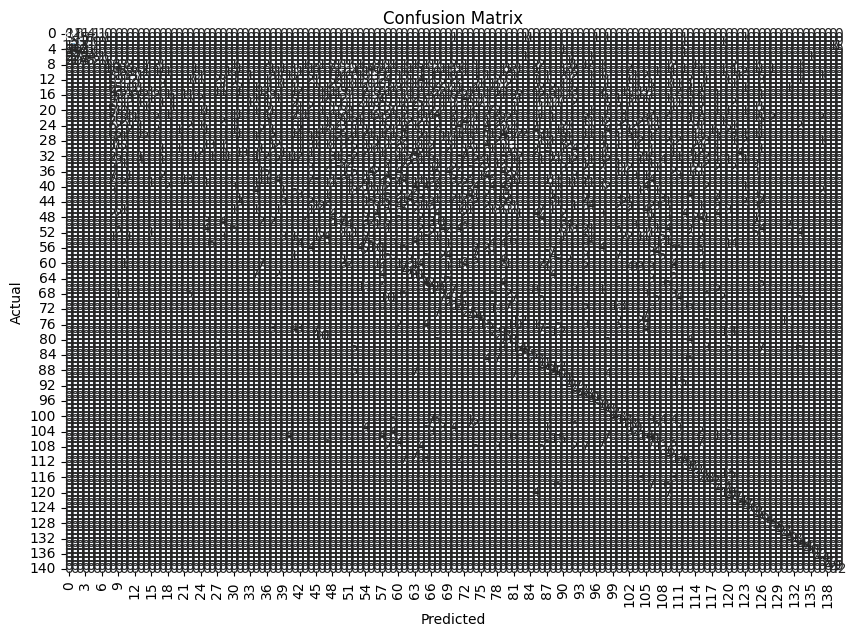

In [87]:
# from sklearn.metrics import confusion_matrix
# # Generate the confusion matrix
# cm = confusion_matrix(y_test, wage_pred)

# # Plot the confusion matrix using seaborn
# plt.figure(figsize=(10, 7))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

# This resulted in a massive mess of numbers due to the sheer volume of data. Cleaning/sampling would be required to make this more presentable. 

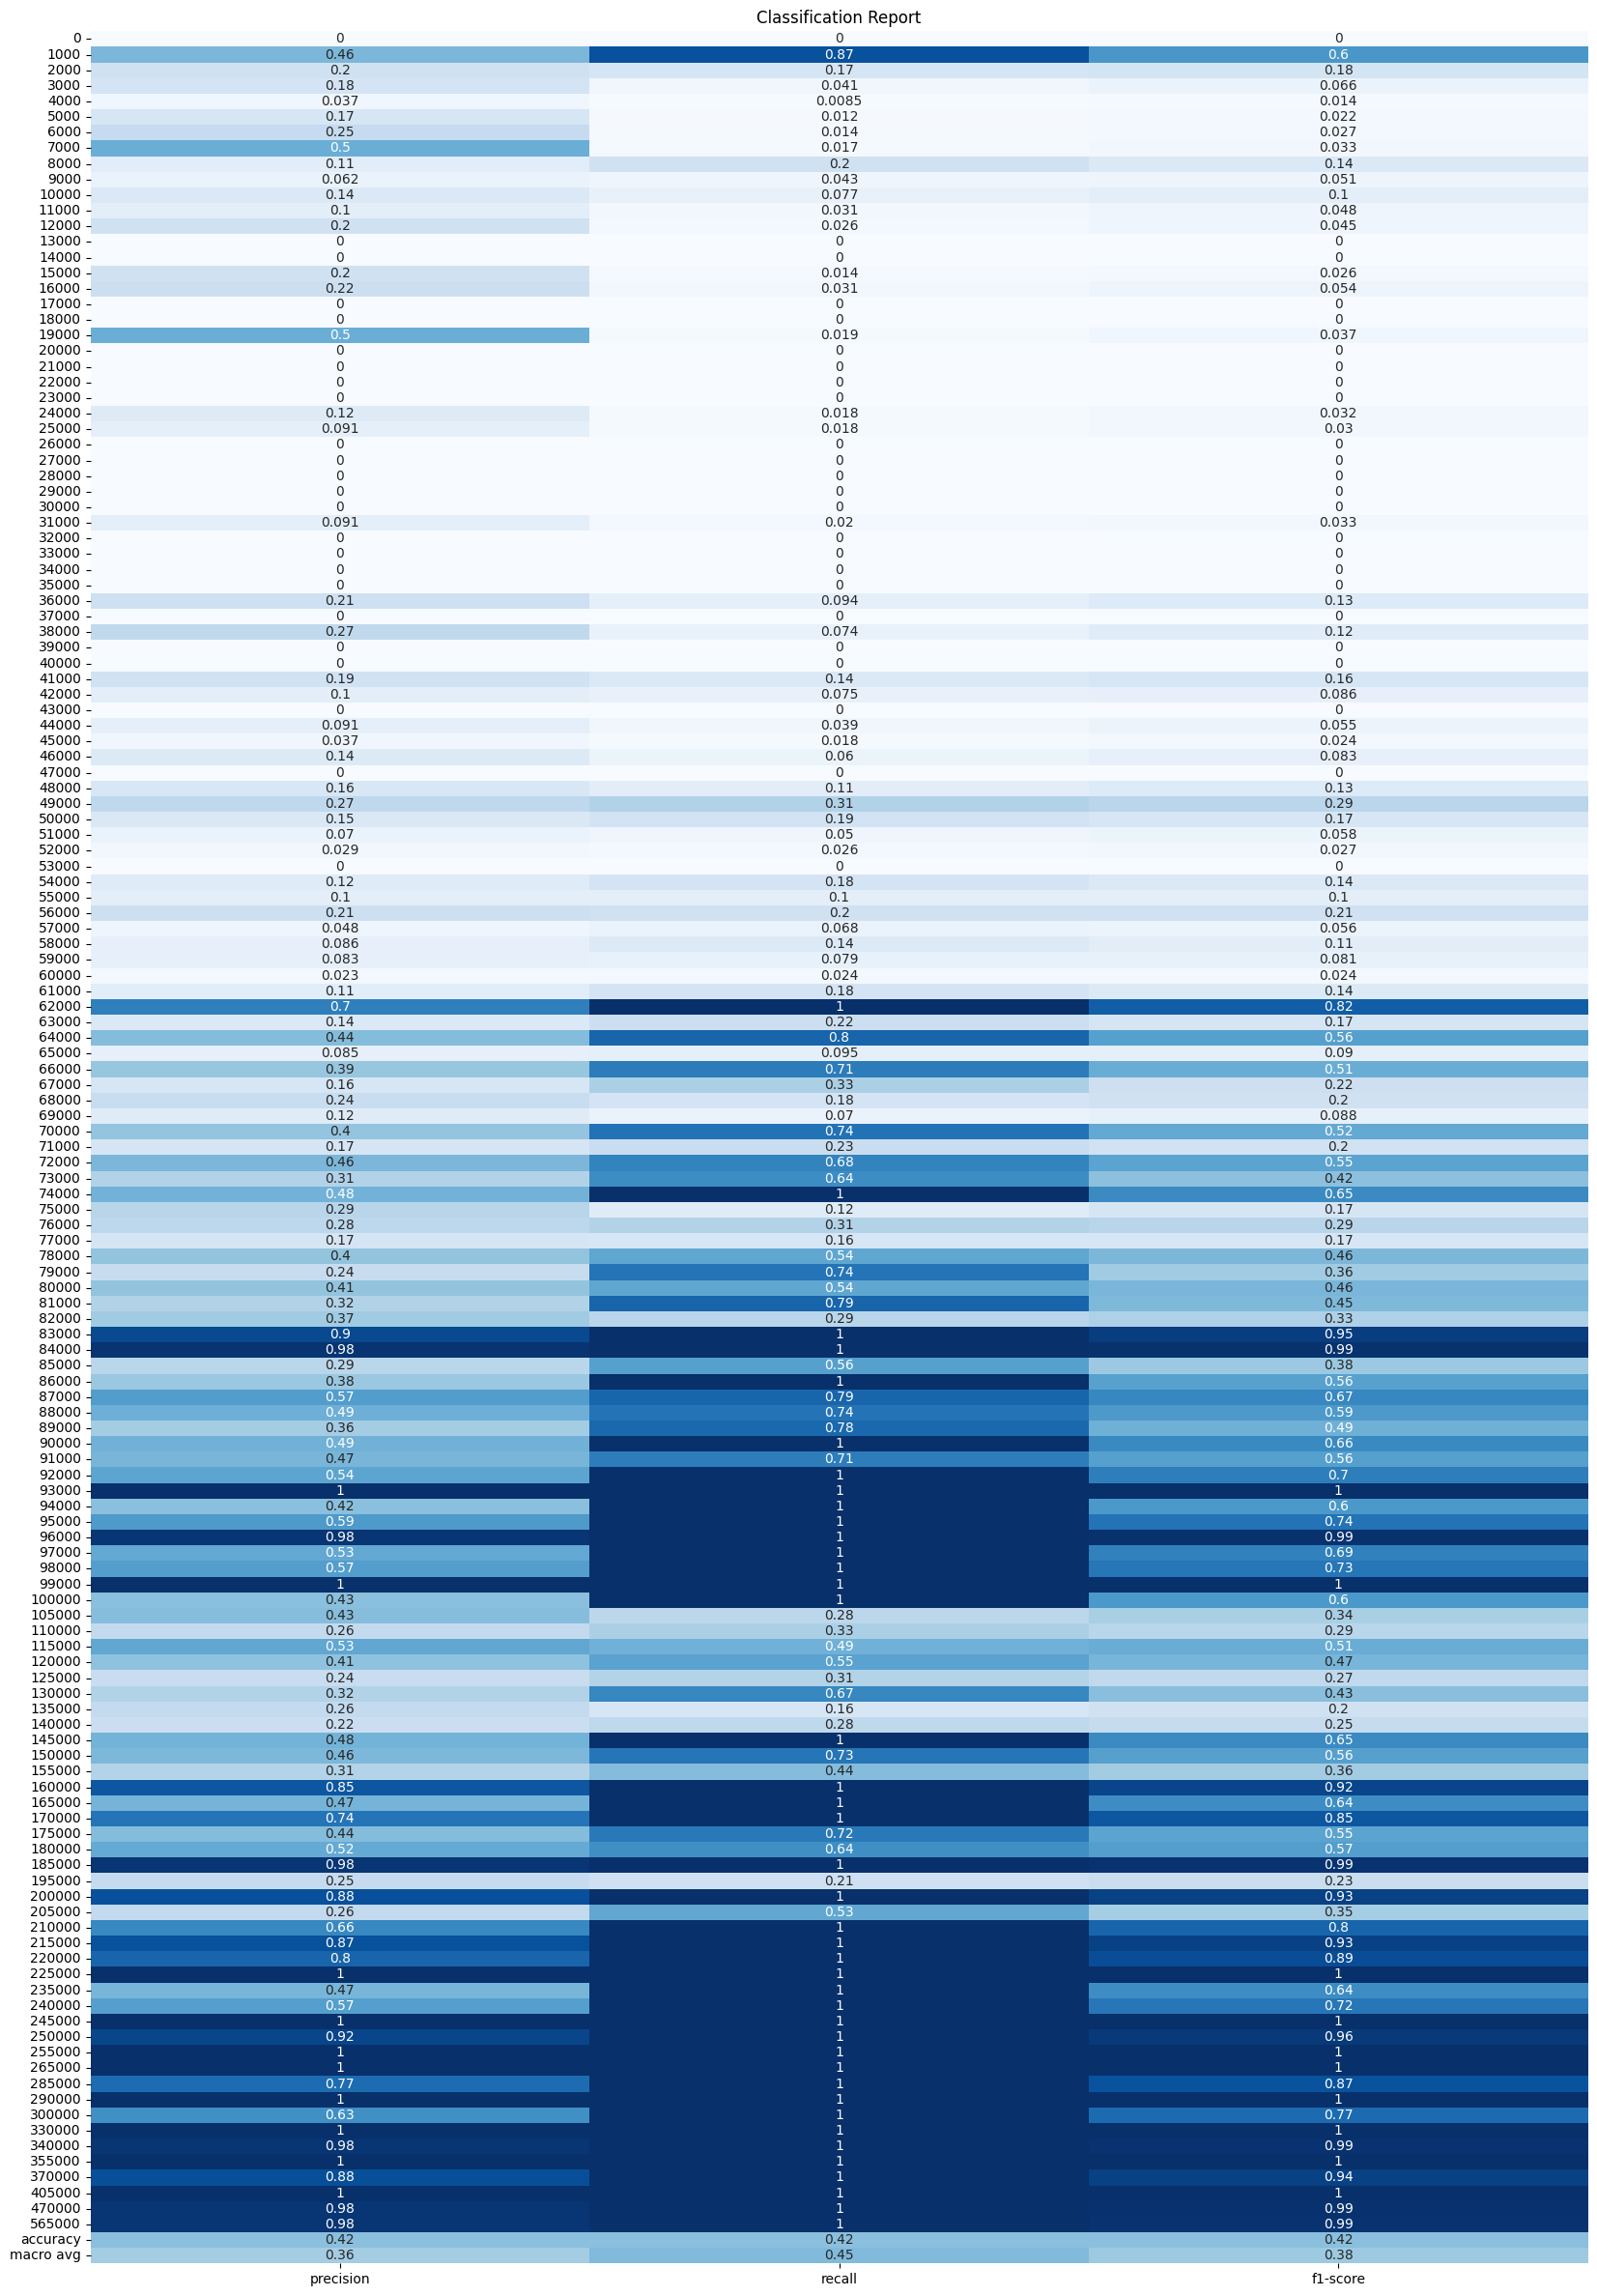

In [95]:
from sklearn.metrics import classification_report
import pandas as pd

# Get classification report as a dictionary
report = classification_report(y_test, wage_pred, output_dict=True, zero_division=0)

# Convert the report into a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot the classification report as a heatmap
plt.figure(figsize=(20, 30))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', cbar=False)
plt.title('Classification Report')
plt.show()

#Heatmap, code from GPT fig size needed adjustment for legibility. 

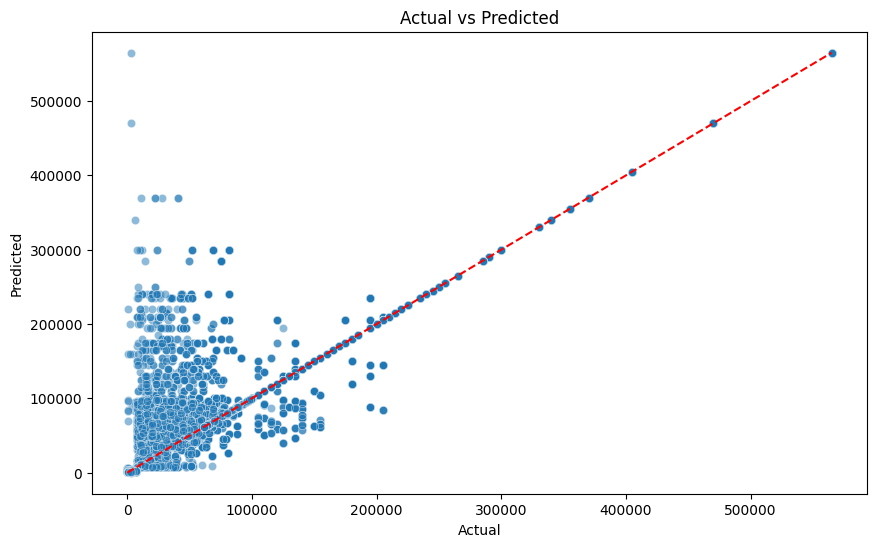

In [96]:
# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': wage_pred})

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(data=comparison_df, x='Actual', y='Predicted', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## Explainations of Process

Please fill in (and extend if required) the list here to explain what you did. There are multiple reasonable things you could do to approach this, so please note what you did here. For most people I assume this will be about 3-5 statements - you don't need to explain the internals of things we covered (e.g. if there's a hypothesis test, you don't need to explain how that works), just how you structured your approach to the problem.

<ul>
<li>First, I did some exploration to get a better understanding of the data, spending some time to do visual analysis, check for na/nulls, summary statistics, and then a correlation matrix. The data is fairly clean (thanks Luiz) and contains a variety of metrics along with wage_eur which is our variable of interest. 

<li> Next I split the data into a train and test set, then created and trained a logistic regression model on the training data, I then recreated the model using different split values and random seeds. After running three iterations and seeing no substantial improvement, I decided to try and adjust the data being used. There are a number of different parameters that are very similiar in scope, so i created a data subset with only one of each of the parameters that can be grouped together, choosing the one with the highest correlation to our target variable wage_eur. This also had minimal effect. I then tried to use a linear regression only to meet errors due to the data being a mix of multiclass and continuous targets. This code was ommited from the file for the sake of cleanliness. 

<li> After careful consideration, review of chat GPT's debugging, the data, and the code, I came to the conclusion that the order in which the model is being trained may have an impact on its accuracy. So my next step is to try to 'shuffle' the data to break up the values and give the model a more varied set of data from the start of the learning process. 

<li> The shuffle had essentially no impact. The problem is not the order of the data, its the skew of the amount of data tailing to the left. After doing some research I found some librarys I can use to over/undersample and try to smooth out the data for the algorithim. Oversampling had a significant impact, but it only added values to a single wage_eur value. Undersampling decimated the 1k value samples. I decided to try to find a way to make it oversample all values where majority is False. This took me a while to learn the required librarys and manipulate the data to get the results I wanted. 

<li> Lastly, I seperated the majority and minority using the 7k wage_eur as a split point, as the majority of the data point are less than that 7k value. Then I applied the overampling to the entirety of the minorty dataset, which duplicated the values to give the machine more opportunities to learn. Then I merged the oversampled data with the original data tested the model. The results took 20 minutes to compute on my Ryzen 9 3900x, and yielded not much difference from the prior test. However, the precision and recall have increased substantially. I then created some visuals from the data, and decided to call this sufficient for the purposes of this assignment, and with respect to the limited time I have available, given that it is finals week. 

<li> If I could work further on this assignment, my next steps would be to continue refining the model by using a combination of over and under sampling the data to try to get a more even distribution in the training data, in hopes of increasing the over all accuracy by giving it a more even distribution of values to learn from. Beyond that I would start looking into the impact of removing some of the parameters, or perhaps some of them with new parameters that are aggregate of the existing parameters. 
</ul>

As well, please answer the following specific questions, based on what you did (~2-3 sentences each):

<ul>
<li> What metric/value/quality did you use to evaluate your model? Why did you choose this?
I chose to use accuracy as the main metric for evaluation. Accuracy is the sum of the true positive and true negative values, divided by the total. I think it is the best metric to gauge the power of the model overall, but precision and recall should have attention paid to them. 

<li> What did you do to improve your model? Why did you choose this? Was there a notable improvement?
I tried a number of methods to improve the model, including changing the test/train split and random seed values, shuffling the order of the data, and more. Ultimately I found some success in using oversampling on the data to adress the skew of the data. The improvement was almost two fold the original results, additional refinement led to a notable increase in the precision and recall of the resampled data. 

<li> What did you do to prepare the data prior to modelling? Why?
I visually inspected the data to try to get a 'feel' for it using .head(), .tail(). I checked for N/A and nulls with .isna() and .isnull(). Then I got overall descriptive stats with .describe(), and a correlation matrix with .corr(). Understanding the underlying data allowed me to make decisions as to what direction i should pursue while trying to increase the power of the model. 

</ul>

Throughout the project, I used Chat GPT to debug errors and gain inspiration as to where to go next, particularly after running mutliple versions of the model and not seeing any improvement in accuracy. No code was copied from GPT back into the project, with the exception of the graphical code blocks near the end of the assignment. 

# Post assignment review
Instructor Comments: 
These are your grades after assessment:
Code quality: 15/15 -- good job on the code.
Results: 10/35 -- You used a logistic regression (a categorical model) to try and infer on continuous data. A simple linear regression would be better.
Process: 40/50 -- Although I like your reasoning and the clarity of your explanations, you went down a rabbit hole of assumptions based on using a logistic regression model, which is not adequate for this type of data.


## Reflection:

Ah, this makes sense, and explains why the changes that I was making had so little effect. I actually did try to switch the model to a linear regression at one point. If memory serves correctly I had encountered an error and brushed it off as, "I guess I have to use the logistic regression". All things considered, I am pretty happy with my mark considering I did the ML equivelent of trying to drive a nail with a screwdriver. Perhaps I will revisit this project at a later date and attempt to improve on the results, but at the time of writing I am entering my next semester, so that classwork takes priority. 


I am still including this in my portfolio despite my massive oversight as I believe it to be a useful window into my problem solving methodology. 
